# Imports

In [18]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [15]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

sns.set()

# 16.1 Non-Linear Features in Classifiers

In [5]:
data = datasets.load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine["class"] = data.target
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
features = ["total_phenols", "color_intensity", "class"]
wine = wine[features]
wine

,total_phenols,color_intensity,class
0,2.80,5.64,0
1,2.65,4.38,0
2,2.80,5.68,0
3,3.85,7.80,0
4,2.80,4.32,0
...,...,...,...
173,1.68,7.70,2
174,1.80,7.30,2
175,1.59,10.20,2
176,1.65,9.30,2


In [10]:
wine.value_counts()

total_phenols  color_intensity  class
1.98           1.95             1        2
2.70           5.10             0        2
2.60           2.76             1        1
               4.60             0        1
               5.05             0        1
                                        ..
1.98           8.50             2        1
2.00           1.28             1        1
               2.06             1        1
               2.20             1        1
1.89           2.95             1        1
Name: count, Length: 176, dtype: int64

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

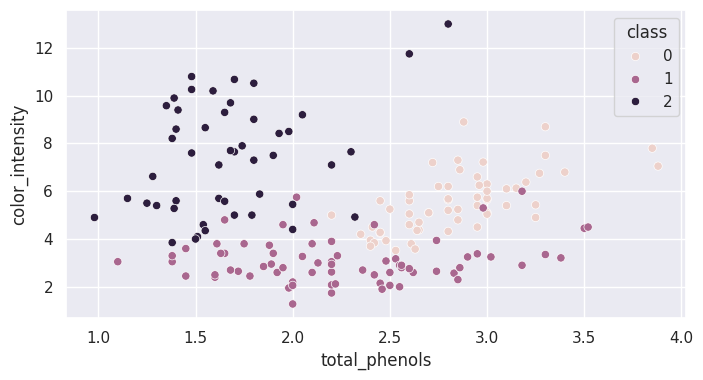

In [16]:
sns.scatterplot(
    data=wine, x=wine["total_phenols"], y=wine["color_intensity"], hue="class"
)

Generate the non-linear features hand-coded

In [17]:
x0, x1 = "total_phenols", "color_intensity"
X = wine[[x0, x1]]
X["phi0"] = X[x0] * X[x1]
X["phi1"] = X[x0] * X[x0]
X["phi2"] = X[x1] * X[x1]
X

,total_phenols,color_intensity,phi0,phi1,phi2
0,2.80,5.64,15.792,7.8400,31.8096
1,2.65,4.38,11.607,7.0225,19.1844
2,2.80,5.68,15.904,7.8400,32.2624
3,3.85,7.80,30.030,14.8225,60.8400
4,2.80,4.32,12.096,7.8400,18.6624
...,...,...,...,...,...
173,1.68,7.70,12.936,2.8224,59.2900
174,1.80,7.30,13.140,3.2400,53.2900
175,1.59,10.20,16.218,2.5281,104.0400
176,1.65,9.30,15.345,2.7225,86.4900


In [19]:
y = wine["class"]

In [23]:
lr = LogisticRegression(multi_class="multinomial").fit(X, y)
accuracy_score(y, lr.predict(X)) * 100.0

90.4494382022472

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

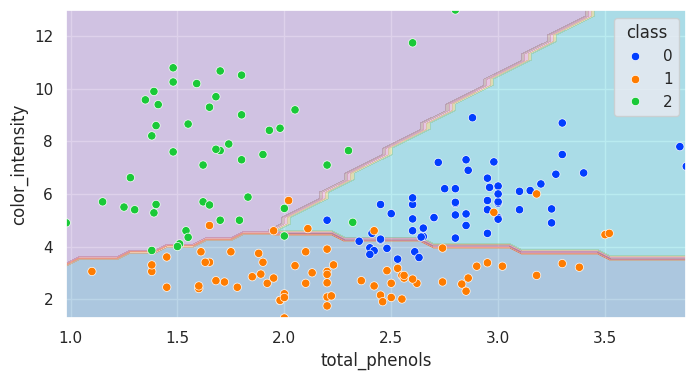

In [27]:
X1 = X[["total_phenols", "color_intensity"]]
lgr = LogisticRegression(multi_class="multinomial").fit(X1, y)

xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
labels = pd.factorize(lgr.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap="tab10", alpha=0.3)
sns.scatterplot(
    data=X1, x="total_phenols", y="color_intensity", hue=y, palette="bright"
)

Can also try other non-linear features, including higher-order polynomial terms and others. Below is a sample of various additional features added

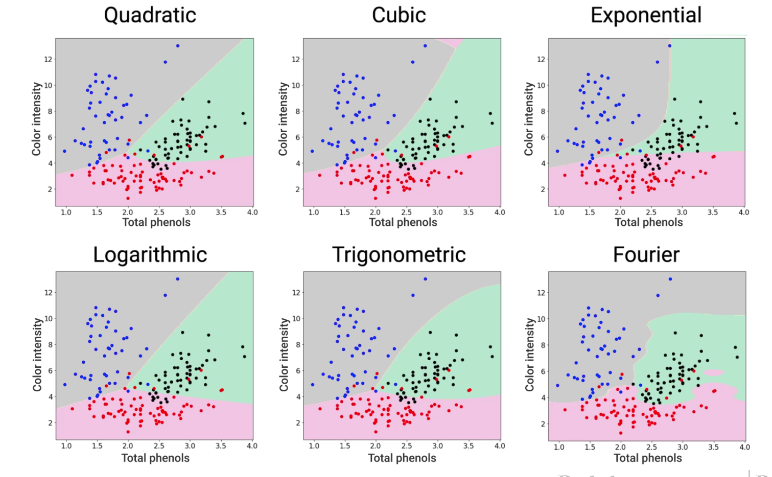

But this space of possible non-linear features is inifinite, so how to choose?
- Use intuition to choose stuff you think should work
- Try many and use lasso to compress away the non-helpful ones
- Use a kernel representation - next video has the details

# 16.2